# [Clasificación de Textos con RNN en TensorFlow](https://www.youtube.com/watch?v=KnmY69TRj98&list=PL7HAy5R0ehQVdPVLV6pIJA9ZE2vVyLRxX&index=51&pp=iAQB)

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [18]:
df = pd.read_csv('df_total.csv')
df

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion


In [24]:
# convierte la variable en categorías
df['targets'] = df['Type'].astype('category').cat.codes

In [25]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [26]:
tfidf = TfidfVectorizer()
Xtrain = tfidf.fit_transform(df_train['news'])
Xtest = tfidf.transform(df_test['news'])

In [27]:
Ytrain = df_train['targets']
Ytest = df_test['targets']

In [30]:
# número de clases
K = df['targets'].max() + 1
K

7

In [33]:
Xtrain

<851x24794 sparse matrix of type '<class 'numpy.float64'>'
	with 201328 stored elements in Compressed Sparse Row format>

In [31]:
# dimensiones
D = Xtrain.shape[1]

In [32]:
# Dimensiones por las palabras generó el vectorizador
D

24794

In [34]:
# construcción del modelo
i = Input(shape=(D,))
x = Dense(300, activation = 'relu')(i)
x = Dense(K)(x) # softmax

model = Model(i, x)

In [35]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 24794)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │     7,438,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         2,107 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,440,607 (28.38 MB)

 Trainable params: 7,440,607 (28.38 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [37]:
# data must not be sparse matrix before passing into tensorflow
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [38]:
r = model.fit(
    Xtrain, Ytrain,
    validation_data= (Xtest, Ytest),
    epochs = 100,
    batch_size= 12,
)

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.4619 - loss: 1.7405 - val_accuracy: 0.6612 - val_loss: 1.1393
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9017 - loss: 0.7285 - val_accuracy: 0.8169 - val_loss: 0.6927
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9882 - loss: 0.1664 - val_accuracy: 0.8251 - val_loss: 0.5532
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9952 - loss: 0.0550 - val_accuracy: 0.8306 - val_loss: 0.5153
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9952 - loss: 0.0282 - val_accuracy: 0.8361 - val_loss: 0.4968
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9992 - loss: 0.0124 - val_accuracy: 0.8361 - val_loss: 0.4967
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9985 - loss: 0.0109 - val_accuracy: 0.8333 - val_loss: 0.4976
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.9970 - loss: 0.0263 - val_accuracy: 0.

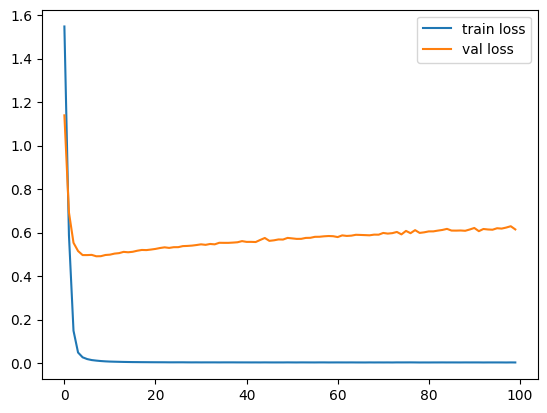

In [39]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

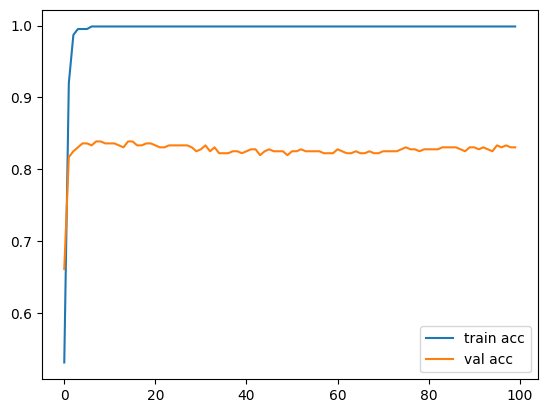

In [40]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

[Clasificación de Textos con RNN en TensorFlow](https://www.youtube.com/watch?v=KnmY69TRj98&list=PL7HAy5R0ehQVdPVLV6pIJA9ZE2vVyLRxX&index=51&pp=iAQB)